In [1]:
import numpy as np
import pandas as pd 
import sklearn 
from sklearn.model_selection import train_test_split

**GROUNDWATER Prediction Using GRACE Satellite **

* Launched 17 March 2002, Gravity Recovery and Climate Experiment (GRACE) twin satelliteshe Gravity Recovery and Climate Experiment (GRACE) twin satellites made detailed measurements of Earth's gravity field and improved investigations about Earth's water reservoirs, over land, ice and oceans. GRACE was a collaboration of the US and German space agencies (NASA and DLR). The key partners were the University of Texas Center for Space Research (CSR), the GeoForschungsZentrum (GFZ) Potsdam, and the Jet Propulsion Laboratory (JPL).

* GRACE measured **gravity by relating it to the distance between the twin satellites. When there was an increase in gravity ahead of the pair, the front satellite sped up and the distance between the pair increased. When there was an increase in gravity between the pair their distance decreased. The opposite occurred when there was decreased gravity ahead of, or between the satellite pair. The satellites were separated by 220 km and could detect changes smaller than a micrometer per second in relative velocity**. These measurements, in conjunction with other data and models, provided observations of terrestrial water storage changes, ice-mass variations, ocean bottom pressure changes and sea-level variations.

* GRACE ended its science mission in 12 October 2017.

* The units of the data and error grids are centimeters of equivalent water thickness; gain factors are dimensionless. If each grid node is g(x,y,t) where x is longitude index, y is latitude index, t is time (month) index, and the scaling grid is s(x,y), then the gain-corrected time series is simply

* g'(x,y,t) = g(x,y,t) * s(x,y)

![](https://podaac.jpl.nasa.gov/sites/default/files/mission_themes/featured_image/Gravity-Recovery-Climate-Experiment-GRACE-Mission-opt.jpg)

## PART A Explotarty Data Analysis

1.   List item
2.   List item



In [2]:
ground_water = pd.read_csv('Ground Water Prediction.csv')
Ground_Water = ground_water.dropna()

In [3]:
print("Latitude Ranges From ",Ground_Water['LAT'].min(),"to",Ground_Water['LAT'].max())
print("Longitude Ranges From ",Ground_Water['LON'].min(),"to",Ground_Water['LON'].max())
print("Total Ground Water Thickness Vary from ",-Ground_Water['TOTAL_THICKNESS'].min(),"to",-Ground_Water['TOTAL_THICKNESS'].max())


Latitude Ranges From  -89.875 to -40.625
Longitude Ranges From  0.125 to 49.375
Total Ground Water Thickness Vary from  10.43199897 to 1.174299836


## Analysis

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Thickness of Ground Water - (Negative means inside earth)')

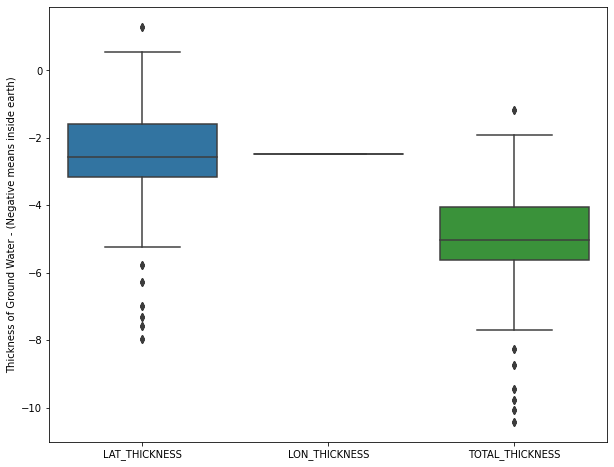

In [5]:
Ground_Water_Subset_1 = Ground_Water[['LAT_THICKNESS','LON_THICKNESS','TOTAL_THICKNESS']]
plt.figure(figsize=(10,8))
sns.boxplot(data=Ground_Water_Subset_1)
plt.ylabel('Thickness of Ground Water - (Negative means inside earth)')


**We saw more variation in Latitude Thickness than Longitude Thickness signifying the water level remains almost constant with longitude**

> Indented block



Text(0.5, 1.0, 'Latitude Longitude Considered')

<Figure size 720x576 with 0 Axes>

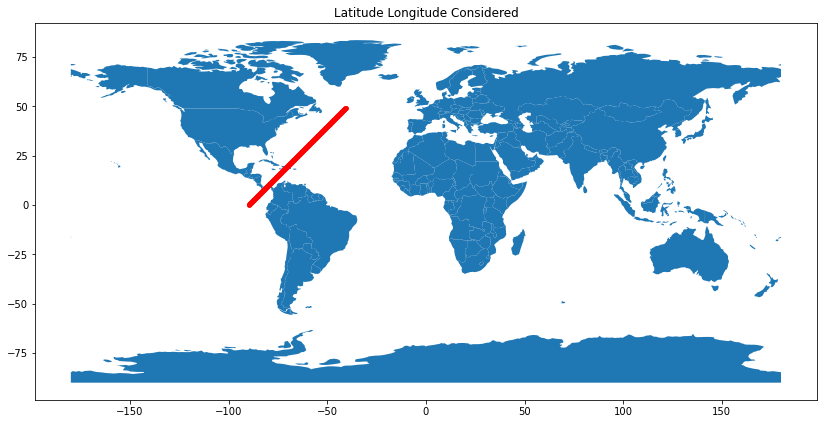

In [6]:

import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(Ground_Water['LAT'], Ground_Water['LON'])]
gdf = GeoDataFrame(Ground_Water, geometry=geometry)   
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
plt.figure(figsize=(10,8))
gdf.plot(ax=world.plot(figsize=(14, 8)), marker='o', color='red', markersize=15)
plt.title('Latitude Longitude Considered')

**bold text**

In [7]:
Ground_Water.head()

,Year,Month,TIME,LAT,LON,LAT_THICKNESS,LON_THICKNESS,TOTAL_THICKNESS,geometry
0,2002,Apr,107.0,-89.875,0.125,-2.468668,-2.468668,-4.937336,POINT (-89.87500 0.12500)
1,2002,May,129.5,-89.625,0.375,-2.468668,-2.468668,-4.937336,POINT (-89.62500 0.37500)
4,2002,Aug,227.5,-89.375,0.625,-3.255136,-2.468668,-5.723804,POINT (-89.37500 0.62500)
5,2002,Sep,258.0,-89.125,0.875,-3.255136,-2.468668,-5.723804,POINT (-89.12500 0.87500)
6,2002,Oct,288.5,-88.875,1.125,-3.255136,-2.468668,-5.723804,POINT (-88.87500 1.12500)


Text(0.5, 1.0, 'Distribution of Thickness')

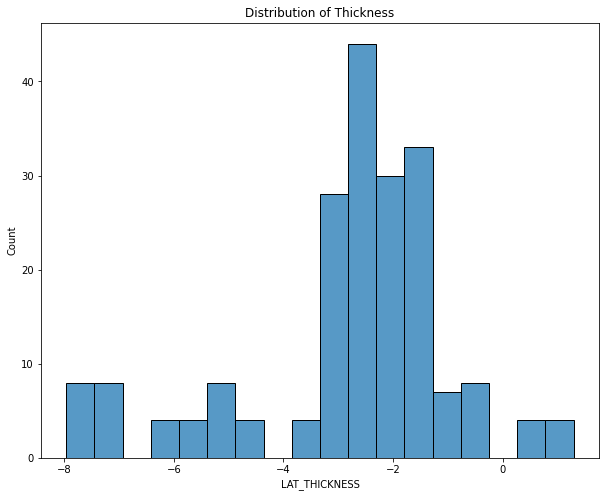

In [8]:
plt.figure(figsize=(10,8))
sns.histplot(x = 'LAT_THICKNESS',data=Ground_Water)
plt.title('Distribution of Thickness')

Text(0.5, 1.0, 'Distribution of Thickness')

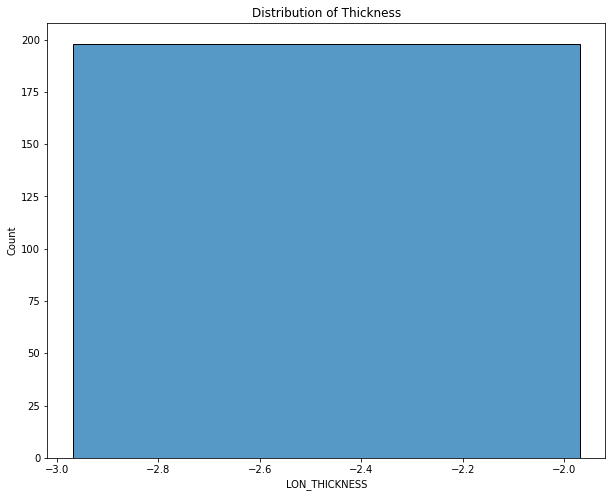

In [9]:
plt.figure(figsize=(10,8))
sns.histplot(x = 'LON_THICKNESS',data=Ground_Water)
plt.title('Distribution of Thickness')

Text(0.5, 1.0, 'Distribution of Thickness')

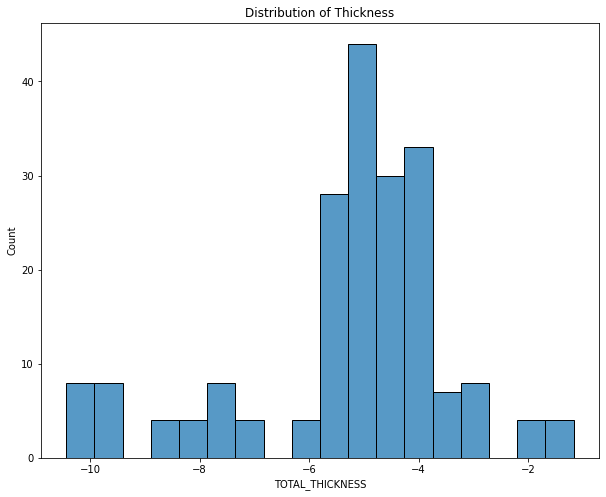

In [10]:
plt.figure(figsize=(10,8))
sns.histplot(x = 'TOTAL_THICKNESS',data=Ground_Water)
plt.title('Distribution of Thickness')

**We deduced that thickness does not vary much longitudly and almost all thickness is generated by thickness that vary by latitudely**

Text(0.5, 1.0, 'Total Thickness as a function of Latitude')

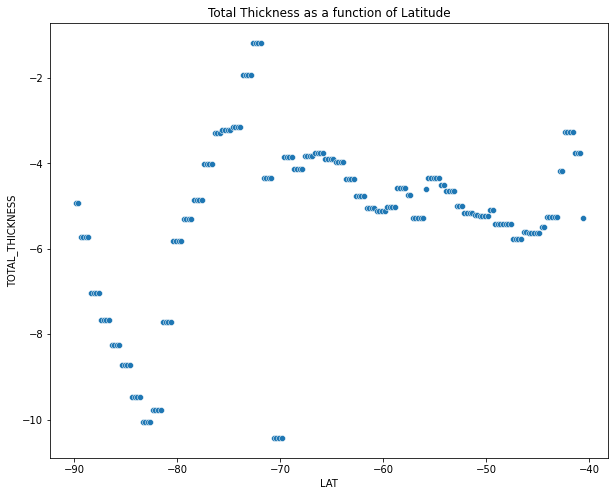

In [11]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = "LAT",y = 'TOTAL_THICKNESS',data=Ground_Water)
plt.title("Total Thickness as a function of Latitude")

Text(0.5, 1.0, 'Total Thickness as a function of Longitude')

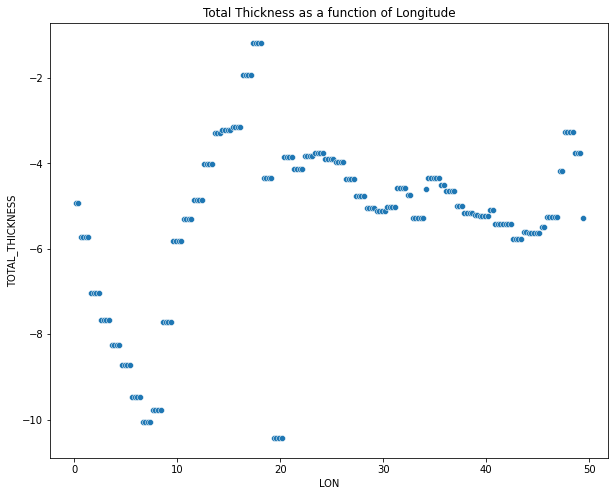

In [12]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = "LON",y = 'TOTAL_THICKNESS',data=Ground_Water)
plt.title("Total Thickness as a function of Longitude")

**We can see the Scatter plot is non linear where the thickness increases to 10 cm and subsequently increase**

Text(0.5, 1.0, 'TOTAL_THICKNESS as function of Month')

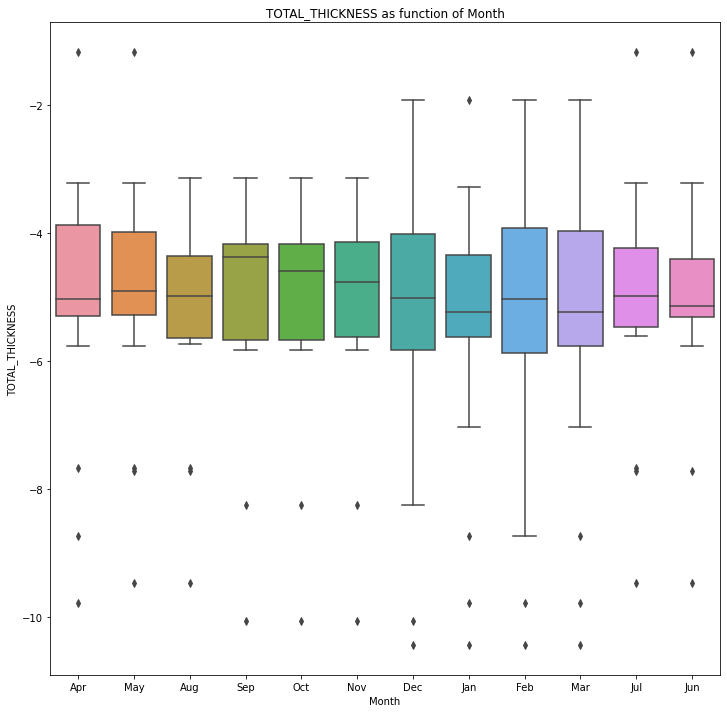

In [13]:
plt.figure(figsize=(12,12))
sns.boxplot(y='TOTAL_THICKNESS',x='Month',data=Ground_Water)
plt.title('TOTAL_THICKNESS as function of Month')

**The Thickness of Ground water is usually pretty even however it varies a lot in the month of Dec and Feb in the Indicated points on the world map above**

Text(0.5, 1.0, 'TOTAL_THICKNESS as function of Year')

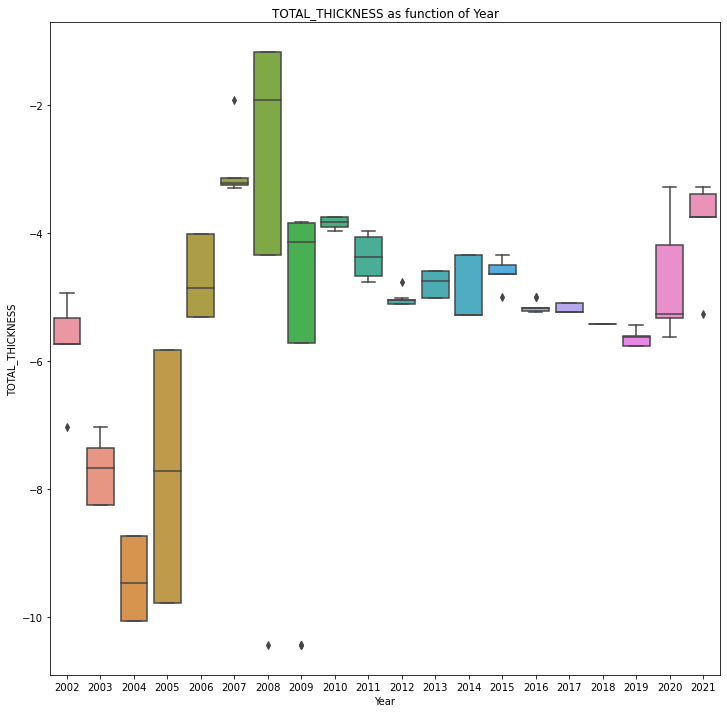

In [14]:
plt.figure(figsize=(12,12))
sns.boxplot(y='TOTAL_THICKNESS',x='Year',data=Ground_Water)
plt.title('TOTAL_THICKNESS as function of Year')

**The Thickness of Ground water is too deep in the month of 2004 and 2005 to a high in 2009**

<AxesSubplot:>

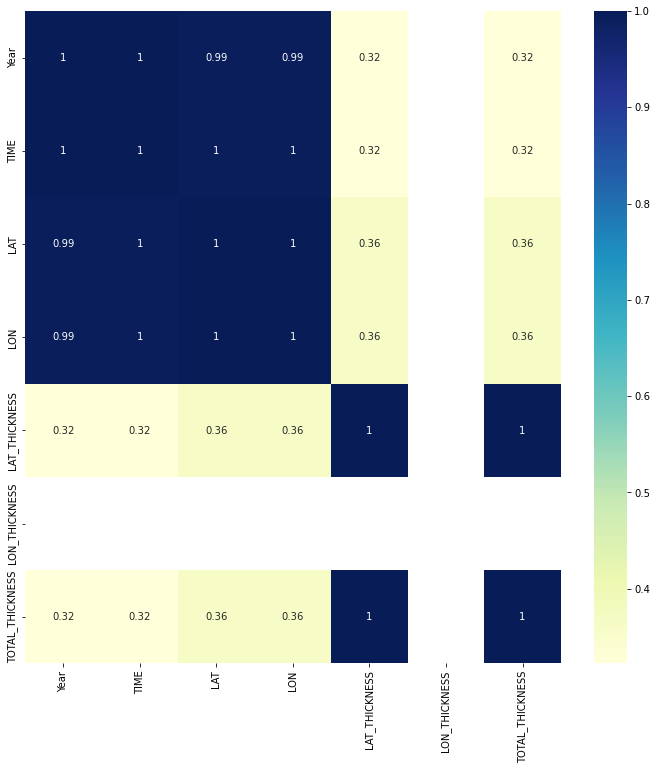

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(Ground_Water.corr(), cmap="YlGnBu", annot=True)

## PART B Machine Learning 

*We would be using Multiple Machine Learning models and comparing their perfomance through Cross Valiadation (Test Set which will be 30% of training data)*

In [16]:
#Decision Tree
ground_water = pd.read_csv('Ground Water Prediction.csv')
Ground_Water = ground_water.dropna()
Ground_Water.drop(['TIME','LAT_THICKNESS','LON_THICKNESS'],axis=1)


,Year,Month,LAT,LON,TOTAL_THICKNESS
0,2002,Apr,-89.875,0.125,-4.937336
1,2002,May,-89.625,0.375,-4.937336
4,2002,Aug,-89.375,0.625,-5.723804
5,2002,Sep,-89.125,0.875,-5.723804
6,2002,Oct,-88.875,1.125,-5.723804
...,...,...,...,...,...
226,2021,Feb,-41.625,48.375,-3.276013
227,2021,Mar,-41.375,48.625,-3.746200
228,2021,Apr,-41.125,48.875,-3.746200
229,2021,May,-40.875,49.125,-3.746200


In [17]:
#Changing TWO COLUMNS TO CATEGORICAL (Year and Month)
Ground_Water['Year'] = Ground_Water["Year"].astype("category")
Ground_Water['Month'] = Ground_Water["Month"].astype("category")

C:\Users\91958\AppData\Local\Temp\ipykernel_36072\921151562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ground_Water['Year'] = Ground_Water["Year"].astype("category")
C:\Users\91958\AppData\Local\Temp\ipykernel_36072\921151562.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ground_Water['Month'] = Ground_Water["Month"].astype("category")


In [18]:
#Cross Validation

X_train, X_test, y_train, y_test = train_test_split(Ground_Water.drop(['TOTAL_THICKNESS','Month'],axis=1),Ground_Water['TOTAL_THICKNESS'], test_size=0.3,random_state=42)



> We would be using Grid Search CV To fine tune the best parameter


> We would be also using the ELASTIC NET which consist of L1 Regularizer and L2 Regularizer and thus helps in keeping the coefficents under control so as to avoid Overfitting





In [19]:
#We would be using grid search CV to BEST FIT THE L1 RATIO
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
parameters = {'l1_ratio': np.arange(0,1,0.1)}
regr = ElasticNet()
cfit = GridSearchCV(regr, parameters)
cfit.fit(X_train, y_train)



C:\Users\91958\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.109e+01, tolerance: 3.947e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\91958\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.991e+01, tolerance: 3.647e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

GridSearchCV(estimator=ElasticNet(),
             param_grid={'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

In [20]:
cfit.score(X_test,y_test)

0.948883234084905

**We got a R2 Value of 94.88% WHICH IS GREAT AND THUS OUR MODEL IS ABLE TO Predict Regression Value to a considerable degree**

In [21]:
Predictions = cfit.predict(X_test)

Text(0.5, 1.0, 'Degree of Fit')

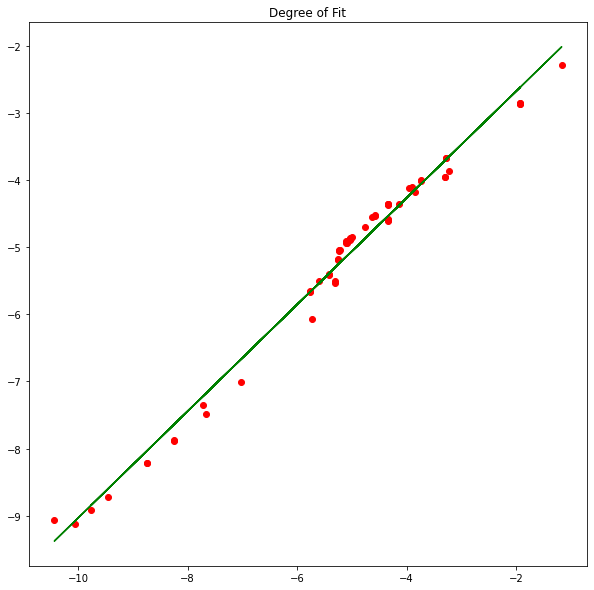

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(x=y_test,y=Predictions,color='red')
m, b = np.polyfit(y_test, Predictions, 1)
plt.plot(y_test, m*y_test+b, color='green')
plt.title('Degree of Fit')

**We set we are able to fit the data almost perfectly and hence our machine learning works well**